In [1]:
#Подгружаем библиотеки, необходимые нам для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sts 
%matplotlib inline
import seaborn as sns

# Задание 1. Загрузить файл

In [2]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Задание 2. Рассчитать основные статистики для переменных

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


# Задание 3. Рассчитать и визуализировать корреляционную матрицу для переменных

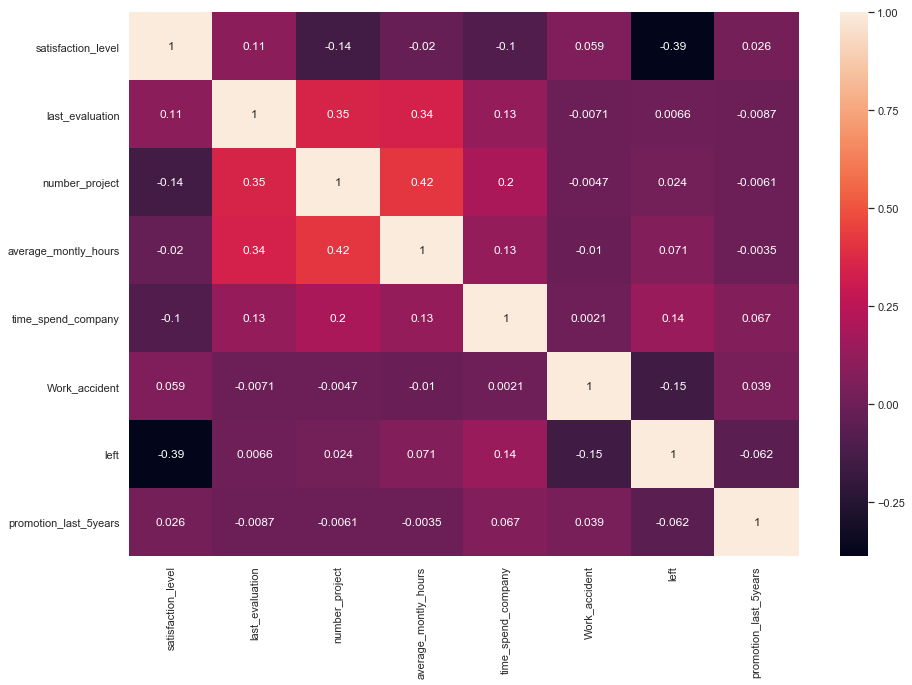

In [10]:
corr_matrix = hr.corr()
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(corr_matrix, annot = True, xticklabels = corr_matrix.columns.values,yticklabels = corr_matrix.columns.values)

# Задание 4. Визуализировать несколько связей между переменными

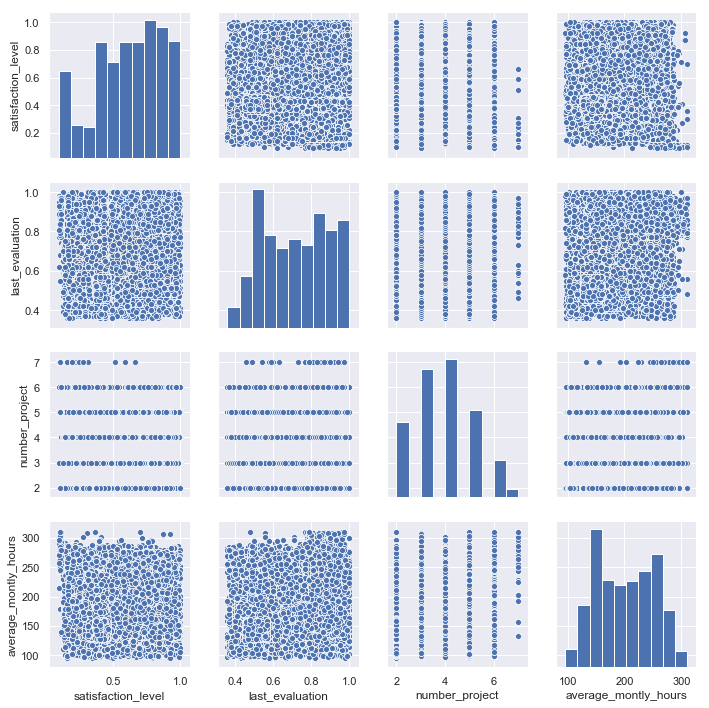

In [11]:
sns.pairplot(hr, vars = ['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours'], kind = 'scatter') 

# Задание 5. Проверка взаимосвязей при помощи t-test 

### Нулевая гипотеза (первая): 
##### Уровень удовлетворенности работой не зависит от зарплаты
##### (т.е. сотрудники с низким и высоким уровнем зарплаты имеют одинаковую удовлетворенность работой) 

In [12]:
low_z = hr.loc[hr['salary']=='low', 'satisfaction_level']
high_z = hr.loc[hr['salary']=='high', 'satisfaction_level']
sts.ttest_ind(low_z, high_z)

Ttest_indResult(statistic=-4.76273109535092, pvalue=1.9413281282548522e-06)

##### Гипотеза опровергнута. Уровень зарплаты  влияет на удовлетворенность от работы

### Нулевая гипотеза (вторая): 
##### Отдел техподдержки заявил, что перерабатывает,а отдел кадров не согласен с этим
##### (т.е. Среднее количество часов работы отделов одинаково) 

In [14]:
otd_hr = hr.loc[hr['sales']=='hr', 'average_montly_hours']
otd_sup = hr.loc[hr['sales']=='support', 'average_montly_hours']
sts.ttest_ind(otd_hr, otd_sup)

Ttest_indResult(statistic=-0.9748278862909453, pvalue=0.3297251383273596)

##### Гипотеза подтверждена. Отдел техподдержки не перерабатывает

# Задание 6. Рассчитать, сколько сотрудников работает в каждом департаменте

In [15]:
work = hr[hr['left']==0]
work['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

# Задание 7. Показать распределение сотрудников по зарплатам

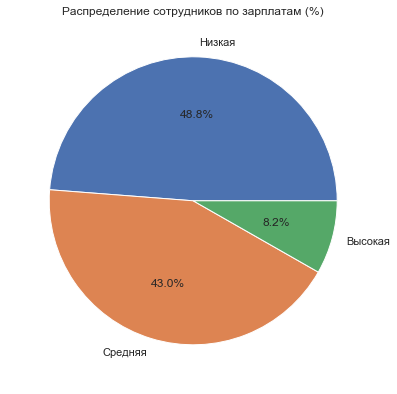

In [17]:
plt.figure(figsize=(5, 5)) #размер окружности
plt.axes([0.0, 0.0, 1.0, 1.0])#размер осей
labels = ['Низкая', 'Средняя', 'Высокая']
plt.pie (hr['salary'].value_counts(), labels=labels, autopct='%.1f%%')
plt.title('Распределение сотрудников по зарплатам (%)')
plt.show()

# Задание 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [5]:
#Получилось очень криво и много, но по-другому не смогла

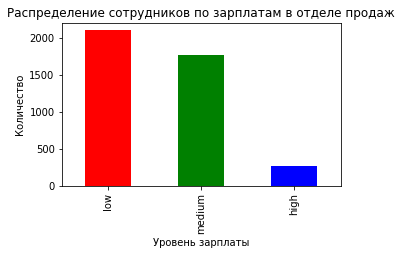

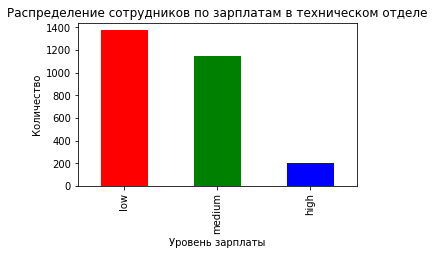

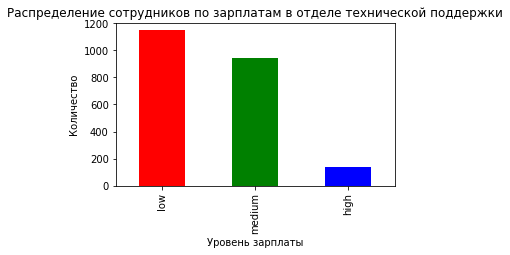

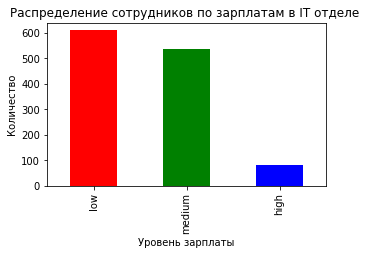

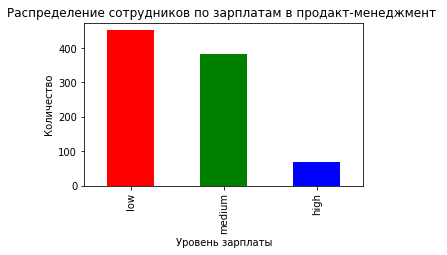

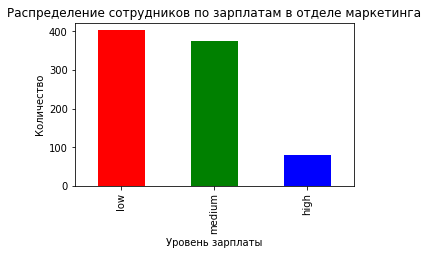

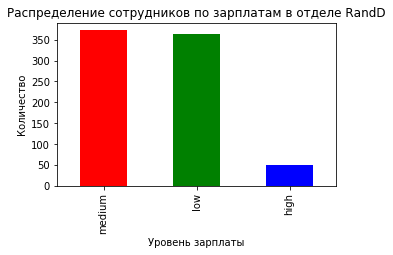

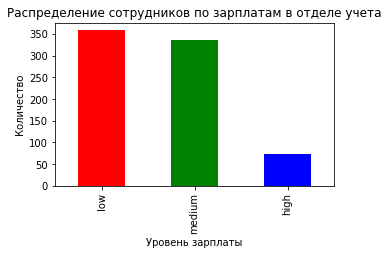

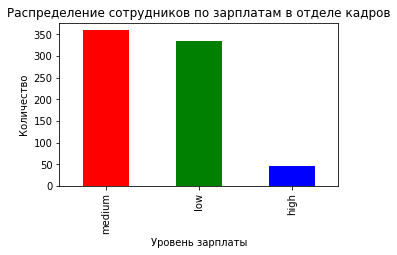

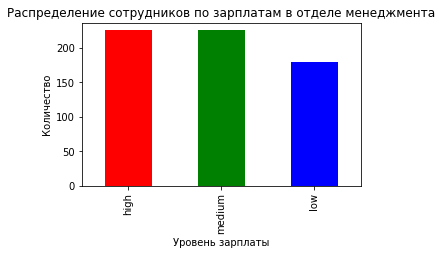

In [4]:
color = ['red', 'green', 'blue']
hr[(hr['sales']=='sales')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в отделе продаж')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='technical')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в техническом отделе')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='support')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в отделе технической поддержки')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='IT')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в IT отделе ')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='product_mng')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в продакт-менеджмент ')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='marketing')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в отделе маркетинга')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='RandD')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в отделе RandD')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='accounting')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в отделе учета')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='hr')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в отделе кадров')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()
hr[(hr['sales']=='management')]['salary'].value_counts().plot.bar(color = color, figsize = (5, 3))
plt.title('Распределение сотрудников по зарплатам в отделе менеджмента')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество')
plt.show()

# Задание 9. Сколько сотрудников покинули компанию

In [20]:
ushly = hr[hr['left']==1]['left'].sum()
print (ushly)

3571


# Задание 10. Почему сотрудники покидают компанию

### Причина 1: Сотрудники, работавшие сверхурочно, покинули компанию (верно)

### Нулевая гипотеза: 
##### Среднее количество часов работы у уволившихся и оставшихся сотрудников одинаково

In [21]:
kch_y = hr.loc[hr['left']==1, 'average_montly_hours']
kch_o = hr.loc[hr['left']==0, 'average_montly_hours']
sts.ttest_ind(kch_y, kch_o)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

##### Гипотеза опровергнута. Среднее количество часов работы отличается.

### Причина 2: Сотрудники, недовольные своей работой, покинули компанию (верно)

### Нулевая гипотеза: 
##### Средний уровень удовлетворенности у уволившихся и оставшихся сотрудников одинаков

In [24]:
yr_ush = hr.loc[hr['left']==1, 'satisfaction_level']
yr_ost = hr.loc[hr['left']==0, 'satisfaction_level']
sts.ttest_ind(yr_ush, yr_ost)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

##### Гипотеза опровергнута. Средний уровень удовлетворенности отличается.